In [53]:
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv("clean_data.csv")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                563 non-null    int64  
 1   radius_mean              563 non-null    float64
 2   texture_mean             563 non-null    float64
 3   perimeter_mean           563 non-null    float64
 4   area_mean                563 non-null    float64
 5   smoothness_mean          563 non-null    float64
 6   compactness_mean         563 non-null    float64
 7   concavity_mean           563 non-null    float64
 8   concave points_mean      563 non-null    float64
 9   symmetry_mean            563 non-null    float64
 10  radius_se                563 non-null    float64
 11  perimeter_se             563 non-null    float64
 12  area_se                  563 non-null    float64
 13  smoothness_se            563 non-null    float64
 14  compactness_se           5

In [56]:
y = df['diagnosis']

In [57]:
y

0      1
1      1
2      1
3      1
4      1
      ..
558    1
559    1
560    1
561    1
562    0
Name: diagnosis, Length: 563, dtype: int64

In [58]:
X = df.drop(['diagnosis'], axis=1)

In [59]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
559,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
560,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
561,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

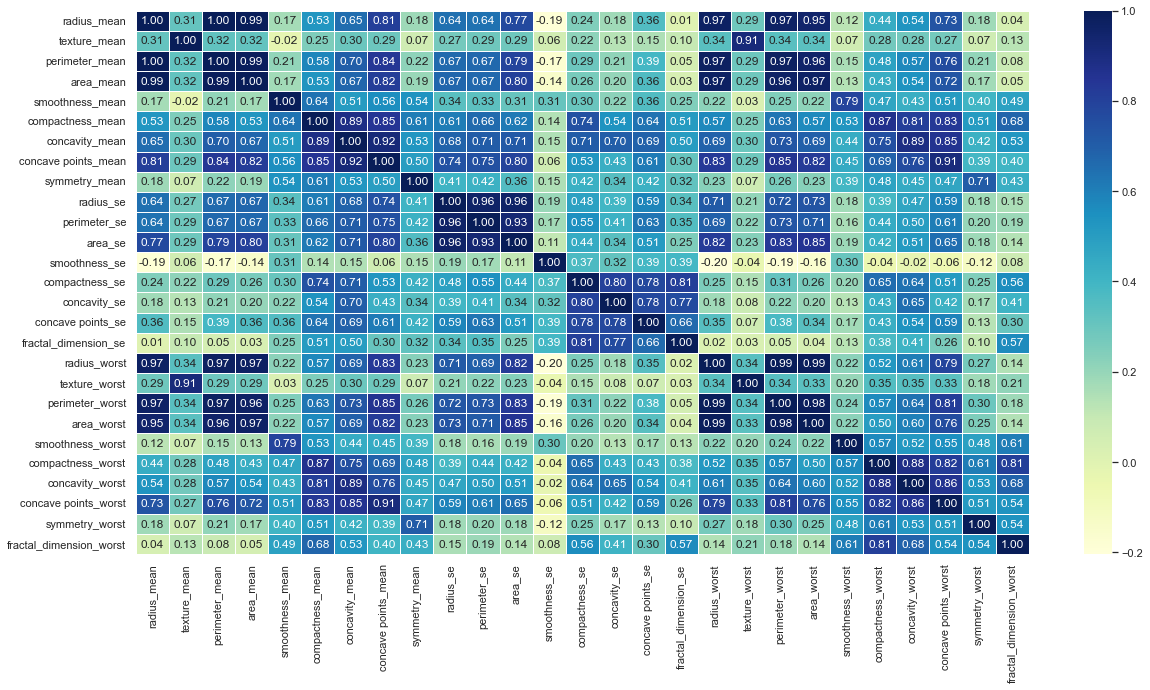

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [62]:
corrs = X_train.corr()
highly_correlated = {}
for i in range(len(corrs.columns)): 
    for j in range(i):
        if corrs.iloc[i,j] > 0.95:
            f1 = corrs.columns[i]
            f2 = corrs.columns[j]
            corr = corrs.iloc[i,j]
            highly_correlated[(f1,f2)] = corr

for features, correlation in highly_correlated.items():
    print(f"Features: {features}, Correlation: {correlation}")

Features: ('perimeter_mean', 'radius_mean'), Correlation: 0.9976179572114218
Features: ('area_mean', 'radius_mean'), Correlation: 0.9909227002314999
Features: ('area_mean', 'perimeter_mean'), Correlation: 0.9902865407458995
Features: ('perimeter_se', 'radius_se'), Correlation: 0.9606766599629076
Features: ('area_se', 'radius_se'), Correlation: 0.9587259594608307
Features: ('radius_worst', 'radius_mean'), Correlation: 0.971553428386424
Features: ('radius_worst', 'perimeter_mean'), Correlation: 0.972920116535148
Features: ('radius_worst', 'area_mean'), Correlation: 0.9680152086770799
Features: ('perimeter_worst', 'radius_mean'), Correlation: 0.9651682962765664
Features: ('perimeter_worst', 'perimeter_mean'), Correlation: 0.972313915633549
Features: ('perimeter_worst', 'area_mean'), Correlation: 0.9631760299405112
Features: ('perimeter_worst', 'radius_worst'), Correlation: 0.9930430013850005
Features: ('area_worst', 'radius_mean'), Correlation: 0.9526515144036473
Features: ('area_worst', 

In [63]:
X_train.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)

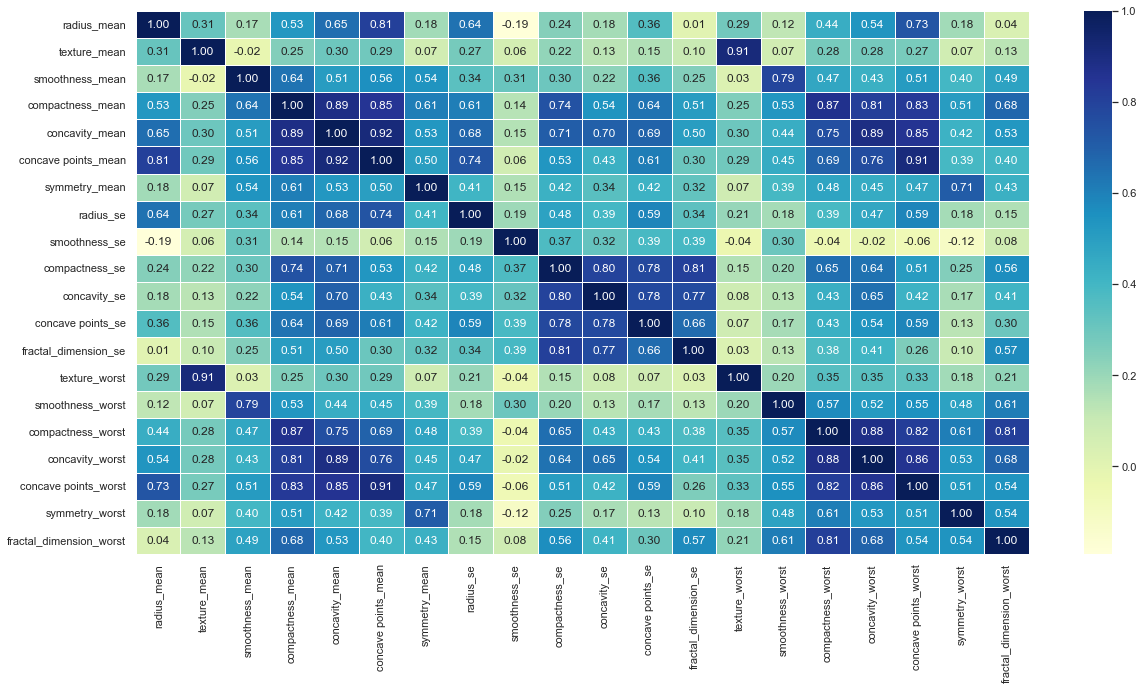

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [65]:
X_test.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[-0.78152612, -1.22277837,  0.27651996, ..., -0.66566116,
        -0.98620792, -0.12803957],
       [-0.22933684,  0.52439001, -0.94891614, ..., -0.06331211,
         0.21639551, -0.65707436],
       [-1.21455876, -0.46665088,  0.33436162, ..., -0.72572405,
         0.03555289, -0.37970592],
       ...,
       [-1.32121848, -0.02374125, -0.72763816, ..., -1.10602676,
        -0.58292887, -0.24262808],
       [ 1.51441877, -0.150986  ,  0.88587512, ...,  1.29562862,
         0.70828744,  0.3404882 ],
       [ 1.73529448,  1.80907264,  0.22338634, ...,  1.42750894,
         0.71732957, -0.39684065]])

In [68]:
from sklearn.decomposition import PCA

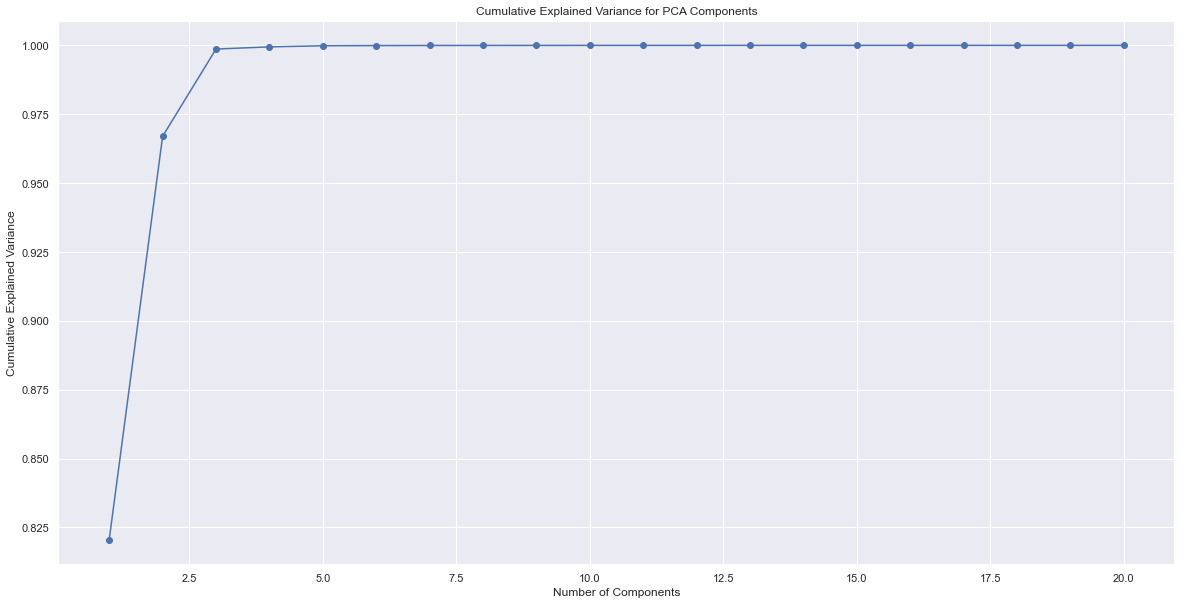

In [70]:
pca = PCA()
X_train_red = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [77]:
X_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,smoothness_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
506,13.400,20.52,0.11060,0.14690,0.144500,0.081720,0.2116,0.3906,0.005414,0.022650,0.034520,0.013340,0.004005,29.66,0.1574,0.38560,0.510600,0.20510,0.3585,0.11090
48,12.050,14.63,0.10310,0.09092,0.065920,0.027490,0.1675,0.2636,0.005488,0.014270,0.023220,0.005660,0.002422,20.70,0.1494,0.21560,0.305000,0.06548,0.2747,0.08301
273,11.330,14.16,0.09379,0.03872,0.001487,0.003333,0.1954,0.2375,0.008426,0.008998,0.001487,0.003333,0.001627,18.99,0.1259,0.07348,0.004955,0.01111,0.2758,0.06386
560,16.600,28.08,0.08455,0.10230,0.092510,0.053020,0.1590,0.4564,0.005903,0.037310,0.047300,0.015570,0.003892,34.12,0.1139,0.30940,0.340300,0.14180,0.2218,0.07820
31,11.840,18.70,0.11090,0.15160,0.121800,0.051820,0.2301,0.4825,0.005551,0.034140,0.042050,0.010440,0.005667,28.12,0.1637,0.57750,0.695600,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,15.280,22.41,0.09057,0.10520,0.053750,0.032630,0.1727,0.2054,0.003290,0.013950,0.017740,0.006009,0.002575,28.03,0.1301,0.32990,0.363000,0.12260,0.3175,0.09772
500,12.220,20.04,0.10960,0.11520,0.081750,0.021660,0.2124,0.1811,0.006272,0.021980,0.039660,0.009894,0.003813,24.17,0.1402,0.23150,0.353500,0.08088,0.2709,0.08839
518,9.847,15.68,0.09492,0.08419,0.023300,0.024160,0.1387,0.2498,0.008732,0.020420,0.010620,0.006801,0.003494,22.99,0.1419,0.22430,0.084340,0.06528,0.2502,0.09209
7,13.710,20.83,0.11890,0.16450,0.093660,0.059850,0.2196,0.5835,0.008805,0.030290,0.024880,0.014480,0.005412,28.14,0.1654,0.36820,0.267800,0.15560,0.3196,0.11510


In [71]:
pca = PCA(n_components=4)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)

### Logistic regression

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [84]:
params = {
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"]
}

logreg = LogisticRegression(max_iter=10000)
logreg_cv=GridSearchCV(logreg,params)
logreg_cv.fit(X_train,y_train)

print("best parameters: ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters:  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9526890756302521


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\User\AppData\Local\Programs\Python\P

In [85]:
logreg = LogisticRegression()
logreg.fit(X_train_red,y_train)

y_pred_train = logreg.predict(X_train_red)
y_pred_test = logreg.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 0.9478672985781991
Testing accuracy: 0.9716312056737588


In [1]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_red, y_train)
y_pred_train = svc.predict(X_train_red)
y_pred_test = svc.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

NameError: name 'X_train_red' is not defined